In [2]:
%pip install pandas numpy seaborn matplotlib plotly scikit-learn
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report, mean_squared_error


In [6]:
df = pd.read_excel("/Users/likhithkanigolla/IIITH/code-files/Digital-Twin/ZF/Sand_test/Sand Data.xlsx")
df = df.drop(columns=["entry_id","tdsValue_without_temp","Voltage"])
df.head()

,Temp,tdsValue,Quantity,Sand
0,27.0000,442.62726,1,0
1,27.0000,454.10141,1,0
2,27.0000,441.36313,1,0
3,27.0000,442.62726,1,0
4,26.9375,440.68250,1,0


In [7]:
df.columns
print("Columns:", df.columns)

df.describe()
print("Description: ",df.describe())

df.info()
print("Info", df.info())

df.isnull().sum()
print("Null Values:", df.isnull().sum())

Columns: Index(['Temp', 'tdsValue', 'Quantity', 'Sand'], dtype='object')
Description:                Temp     tdsValue     Quantity         Sand
count  1750.000000  1750.000000  1750.000000  1750.000000
mean     26.849786   472.404491     1.514857   254.342857
std       0.958990    37.434204     0.499922   160.868843
min      25.562500    13.370180     1.000000     0.000000
25%      26.187500   465.702088     1.000000   100.000000
50%      26.500000   474.176820     2.000000   300.000000
75%      27.187500   487.686800     2.000000   400.000000
max      30.000000   608.480220     2.000000   500.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Temp      1750 non-null   float64
 1   tdsValue  1750 non-null   float64
 2   Quantity  1750 non-null   int64  
 3   Sand      1750 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 54.8 KB


Heat Map: 


<Axes: >

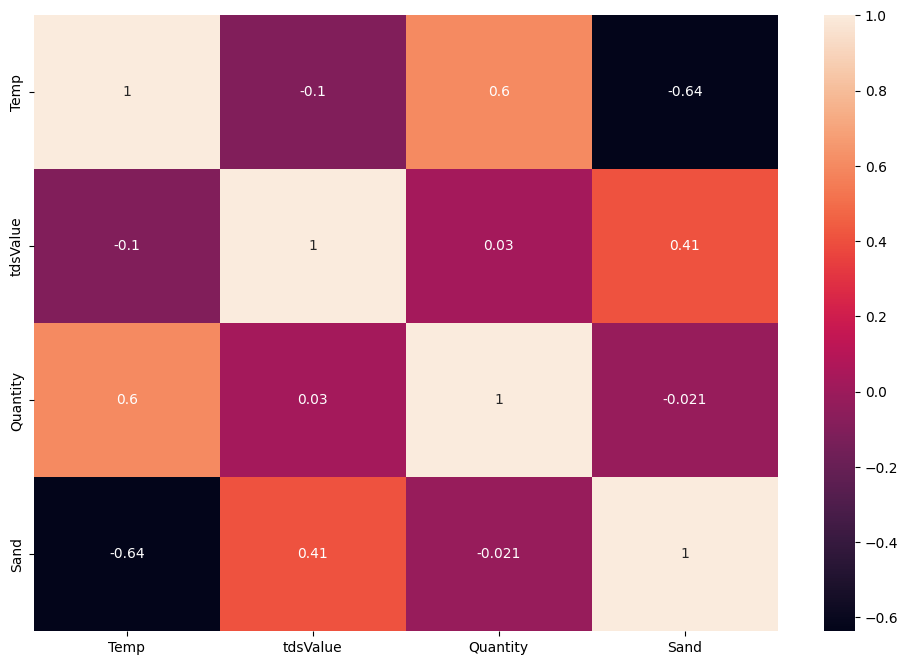

In [8]:
print("Heat Map: ")
plt.figure(figsize= (12,8))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='tdsValue', ylabel='count'>

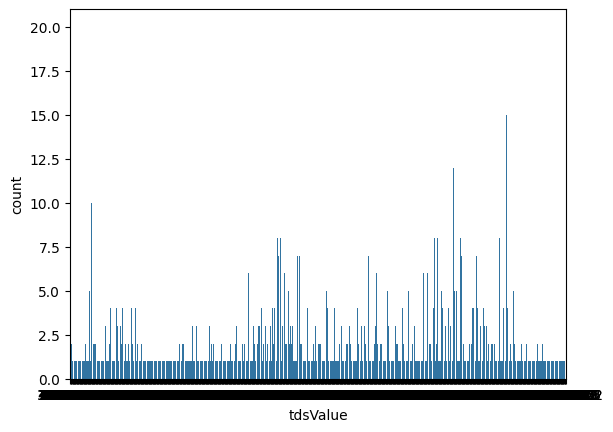

In [9]:
sns.countplot(x="tdsValue", data=df)

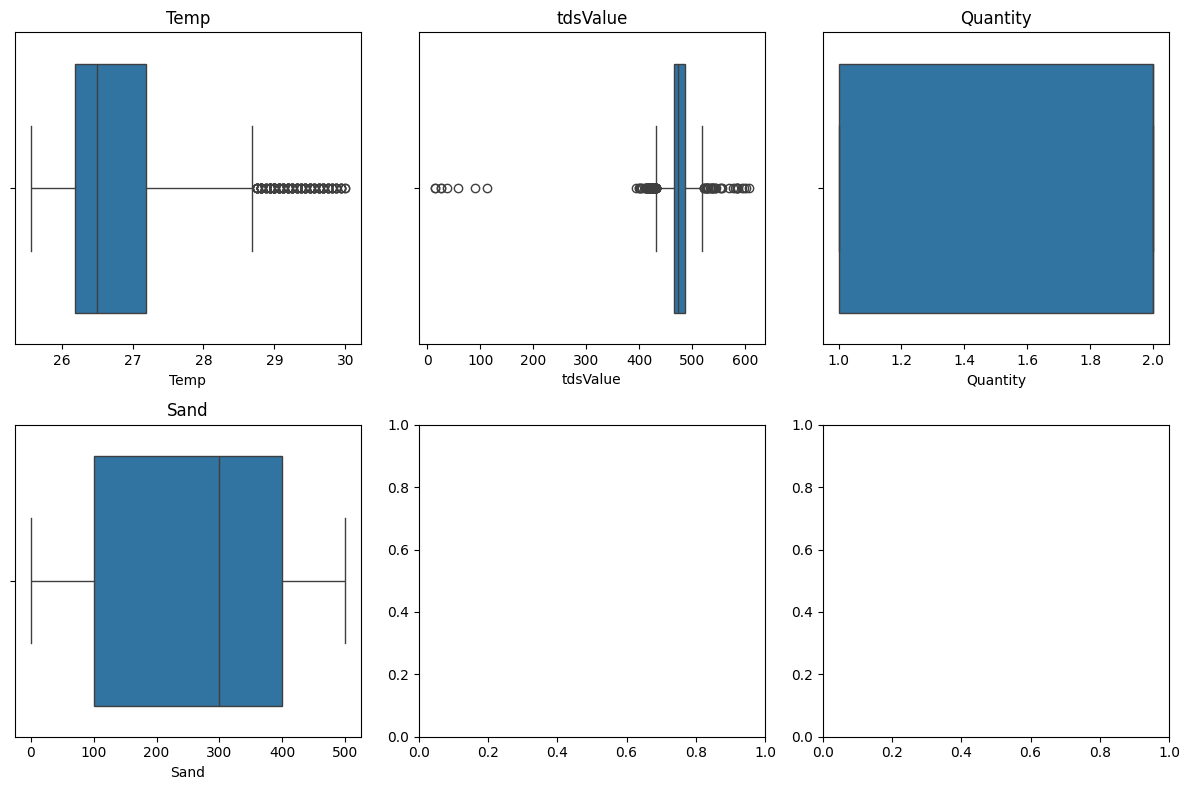

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, col in enumerate(df.columns):
    sns.boxplot(x=col, data=df, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(col)

plt.tight_layout()
plt.show()


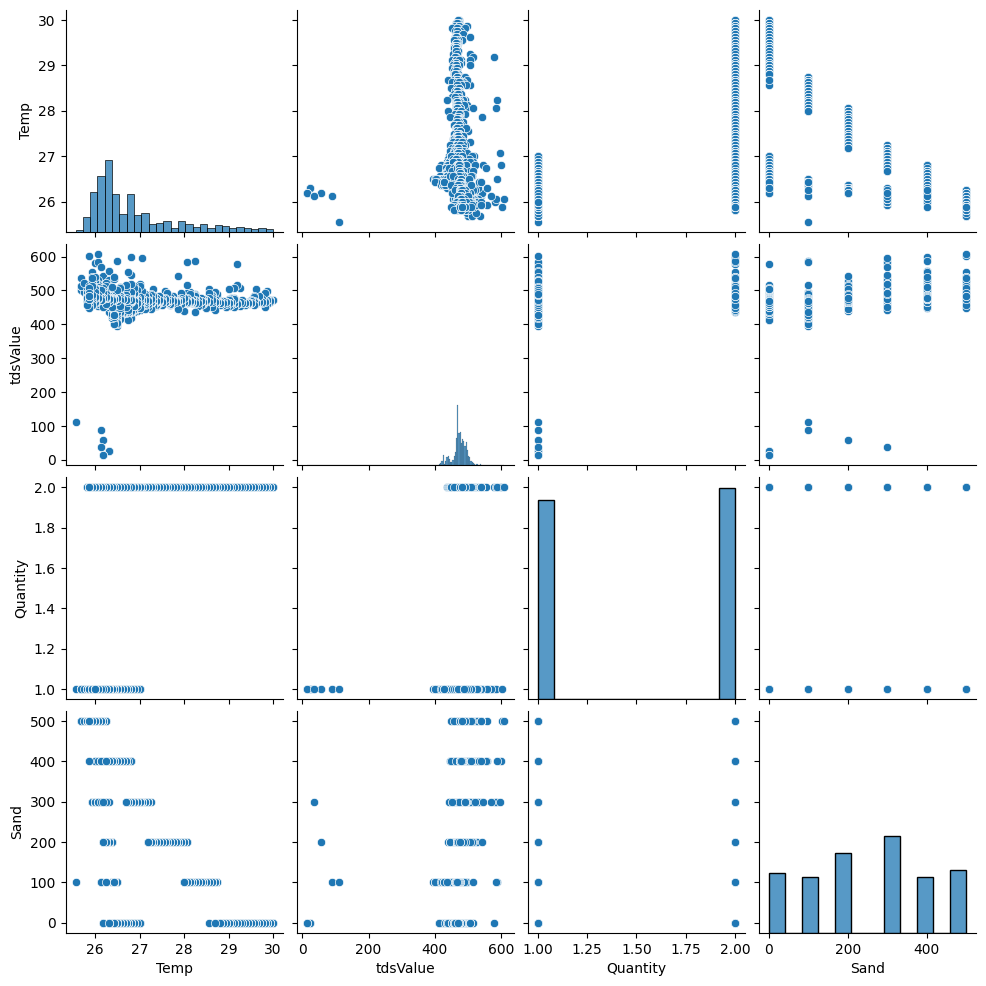

In [11]:
sns.pairplot(df)

In [12]:
x = df.drop("tdsValue", axis=1)
y = df["tdsValue"]
x.shape, y.shape

((1750, 3), (1750,))

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
x_train.shape, x_test.shape

((1400, 3), (350, 3))

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming x_train, x_test, y_train, y_test are already defined

degree = 3
poly_features = PolynomialFeatures(degree=degree)

x_poly_train = poly_features.fit_transform(x_train)
x_poly_test = poly_features.transform(x_test)

poly_regressor = LinearRegression()
poly_regressor.fit(x_poly_train, y_train)
y_pred_pr = poly_regressor.predict(x_poly_test)

mse_pr = mean_squared_error(y_test, y_pred_pr)
print("Mean Squared Error:", mse_pr)

intercept = poly_regressor.intercept_
coefficients = poly_regressor.coef_
print("Linear Regression Equation:")
# print(f"y = {intercept} + {coefficients[0]} * x1 + {coefficients[1]} * x2 + ...")
print(coefficients)





Mean Squared Error: 814.3258540227025
Linear Regression Equation:
[ 0.00000000e+00  1.13485838e+05  5.39734942e+03  4.80061237e+02
 -5.27561600e+03  6.56563867e+04 -4.73027645e+01  1.61920990e+04
  2.86982984e+02 -8.98806419e-02  5.04128527e+01  4.65016124e+02
  8.17845493e-01 -3.00025932e+04  4.50702697e-01  3.35943419e-03
  3.77815644e+04 -9.91725723e+01 -1.07931292e-03  8.43248838e-07]


In [ ]:
import joblib

# Save the polynomial model
joblib.dump(poly_regressor, 'polynomial_model.pkl')


Epoch 1/3


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


ValueError: Cannot set tensor: Dimension mismatch. Got 3 but expected 35 for dimension 1 of input 0.